In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [31]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [32]:
import os
os.chdir('/content/gdrive/My Drive/Data_Sicience/')

In [33]:
df_dirty = pd.read_csv('cost_revenue_dirty.csv')

In [34]:
df_dirty.shape

(5391, 6)

Xem dữ liệu
- Production Budget ($): kinh phí đầu tư

- Domestic Gross ($)   : doanh thu trong nước

- Worldwide Gross ($)  : doanh thu về trên toàn thế giới

In [35]:
df_dirty.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [36]:
# Đọc tập tin cost_revenue_clean.csv vào dataframe
df = pd.read_csv('cost_revenue_clean.csv')

In [15]:
# Xem thông tin
df.shape

(5034, 2)

In [37]:
df.head()

,production_budget_usd,worldwide_gross_usd
0,1000000,26
1,10000,401
2,400000,423
3,750000,450
4,10000,527


**Mô hình hóa dữ liệu: Input, Output**

In [38]:
X = df[['production_budget_usd']]
y = df['worldwide_gross_usd']

**Hồi quy tuyến tính**

In [39]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

**Phương trình đường thẳng (không gian 2D): y = m.x + b**

In [40]:
slope   = regr.coef_[0]
bias    = regr.intercept_

print('   y = (', slope, ') * X + (', bias, ')')

   y = ( 3.1115091829361265 ) * X + ( -7236192.729139581 )


**Biểu diễn trực quan dữ liệu**

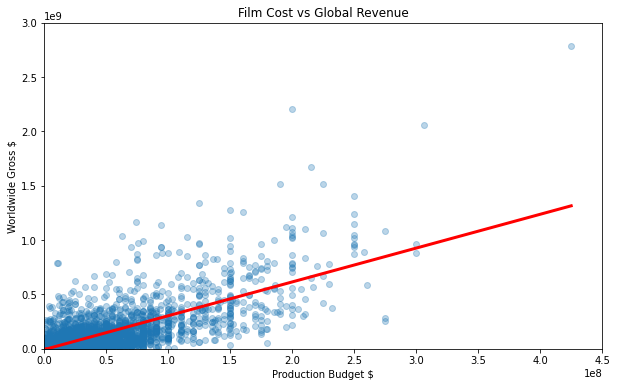

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)

plt.plot(X, regr.predict(X), color='red', linewidth=3)

plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

**Thông tin của film Avatar**

In [42]:
avatar = df_dirty[df_dirty['Movie Title']=='Avatar'].reset_index()
avatar

,index,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,3529,1,12/18/2009,Avatar,"$425,000,000","$2,783,918,982","$760,507,625"


**Dự đoán doanh thu phim Avatar**

In [43]:
X_pred = [[425000000]]
y_pred = regr.predict(X_pred)
print('Dự đoán doanh thu:', '${:,}'.format(y_pred[0]))
print('Doanh thu thực tế:', avatar.loc[0,'Worldwide Gross ($)'])

Dự đoán doanh thu: $1,315,155,210.0187142
Doanh thu thực tế: $2,783,918,982
